# <Center>Logistic Regression Implementation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
%matplotlib inline

In [2]:
os.chdir("D:/Imarticus/Supervised Learning/Logistic Regression/Data Shared by sir")
netflix_df=pd.read_csv('D:/Imarticus/Supervised Learning/Logistic Regression/Data Shared by sir/netflix.csv')

In [3]:
netflix_df.head()

,Age,Subscription
0,62,1
1,18,0
2,40,0
3,51,1
4,37,1


In [4]:
y=netflix_df.Subscription
x=netflix_df.Age

In [5]:
logit_model=sm.Logit(y,x)

In [6]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.637599
         Iterations 4


In [7]:
result.summary2() # we Use summary2 for logistic function bcz summary is used for linear function.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.053  
Dependent Variable: Subscription     AIC:              27.5040
Date:               2021-09-06 20:09 BIC:              28.4997
No. Observations:   20               Log-Likelihood:   -12.752
Df Model:           0                LL-Null:          -13.460
Df Residuals:       19               LLR p-value:      nan    
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     4.0000                                    
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Age       0.0159     0.0111   1.4386   0.1503   -0.0058   0.0376
==============================================================

"""

## Logistic Regression Case study

In [8]:
Insurance_data=pd.read_csv('carInsurance_train.csv')
Insurance_test=pd.read_csv('carInsurance_test.csv')

In [9]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [10]:
Insurance_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [11]:
print('Shape of training data',Insurance_data.shape)
print('Shape of test data', Insurance_test.shape)

Shape of training data (4000, 19)
Shape of test data (1000, 19)


In [12]:
Insurance_data.isna().sum() # Finding the missing Values in number

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [13]:
Insurance_data.isnull().any() ## Finding the missing Values in boolean

Id                  False
Age                 False
Job                  True
Marital             False
Education            True
Default             False
Balance             False
HHInsurance         False
CarLoan             False
Communication        True
LastContactDay      False
LastContactMonth    False
NoOfContacts        False
DaysPassed          False
PrevAttempts        False
Outcome              True
CallStart           False
CallEnd             False
CarInsurance        False
dtype: bool

In [14]:
Insurance_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [15]:
Insurance_data.describe(include='object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


In [16]:
Insurance_data.select_dtypes(include='object').columns # getting all the object columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

## Vizualizing Data

In [17]:
Insurance_data.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [18]:
impt_feats=['Age', 'Balance',
       'HHInsurance', 'CarLoan', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance']

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


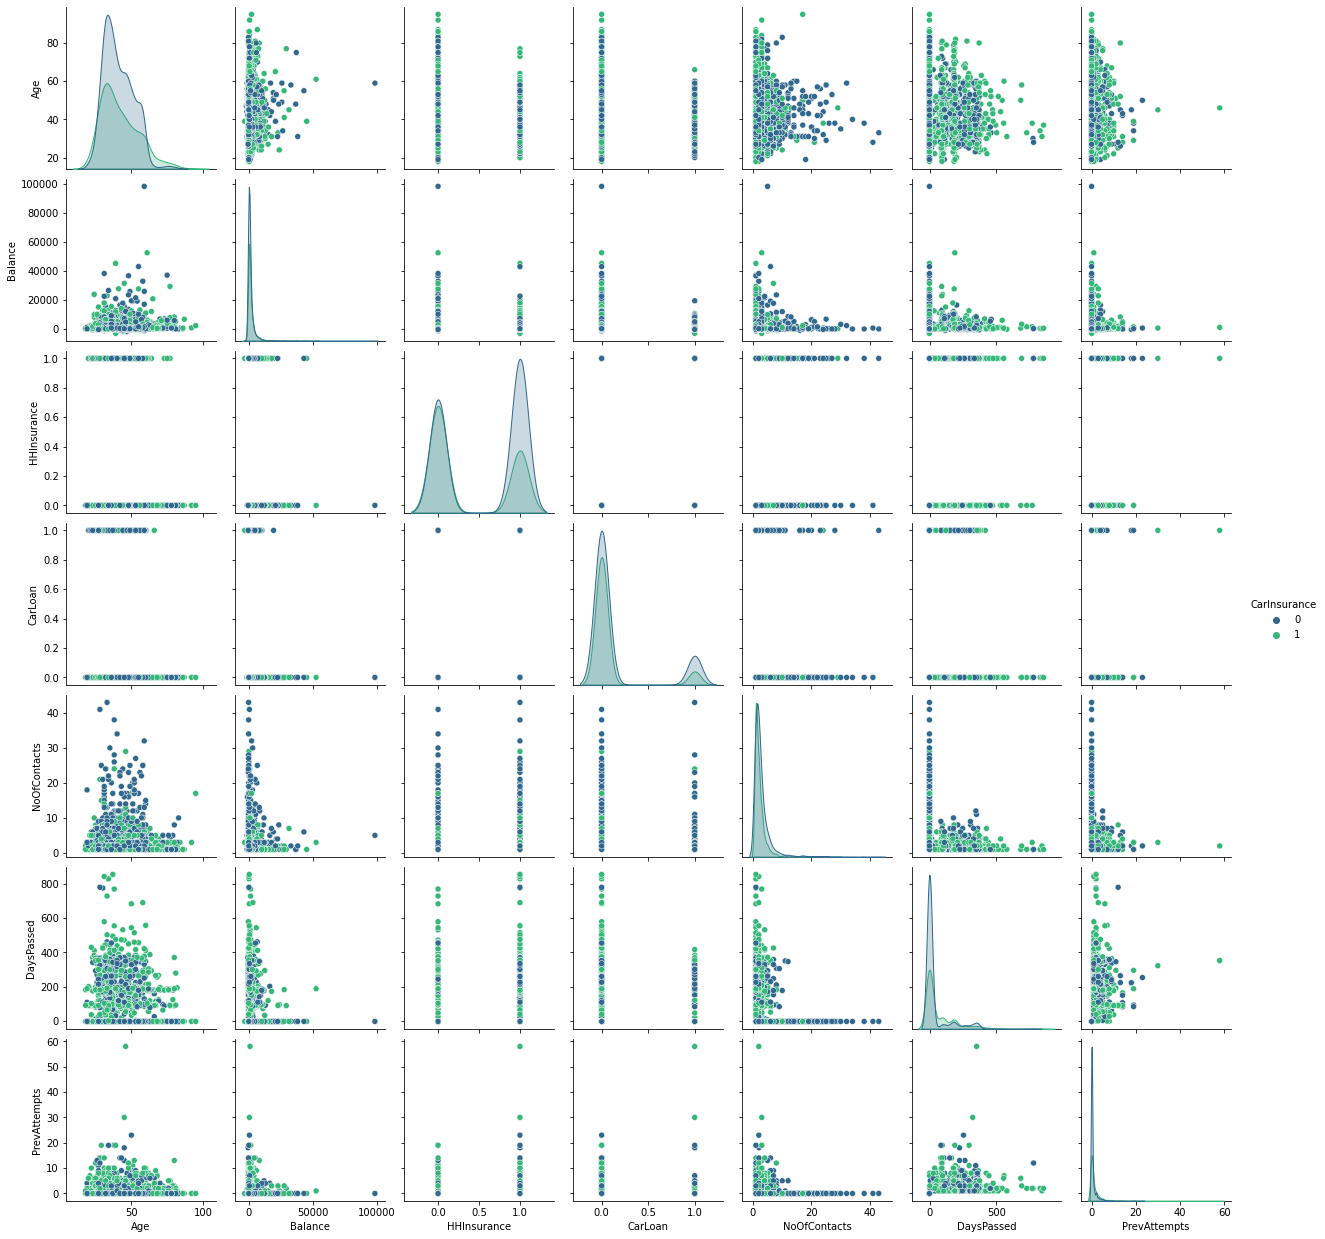

In [19]:
sns.pairplot(Insurance_data[impt_feats],hue='CarInsurance',palette='viridis',size=2.5)

<h3>Note:</h3>In the above graph we can clearly see in the Age vs Age distribution plot that above 50 age  people is not buying the CarInsurance  

In [20]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


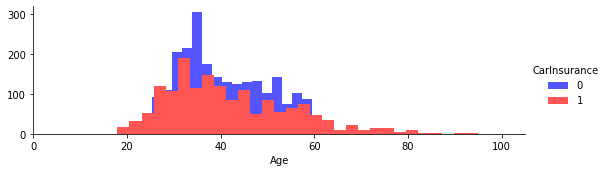

In [21]:
# Take a Further look at age
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30)
facet.set(xlim=(0,Insurance_data.Age.max()+10))
facet.add_legend()
# Do this for balance and other continuous variable

<h3>Note:</h3>
As can be seen in between age 30 to 60 the proportion of not buying the car-insurance in more as compared to buyers 

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


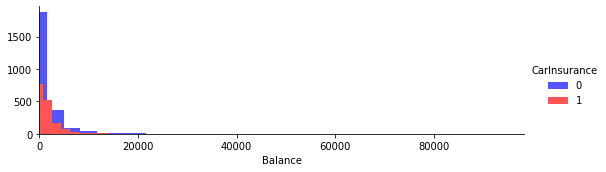

In [22]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'Balance',bins=30)
facet.set(xlim=(0,Insurance_data.Balance.max()+10))
facet.add_legend()

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


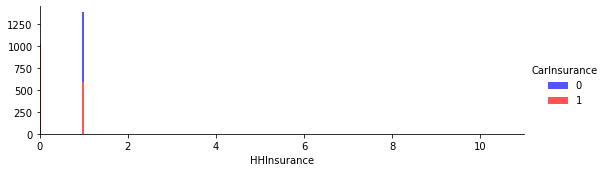

In [23]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'HHInsurance',bins=30)
facet.set(xlim=(0,Insurance_data.HHInsurance.max()+10))
facet.add_legend()

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


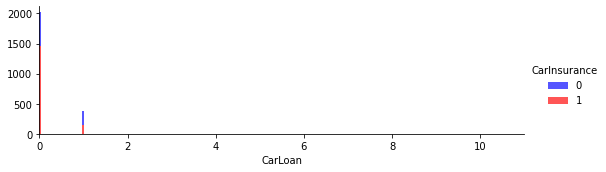

In [24]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'CarLoan',bins=30)
facet.set(xlim=(0,Insurance_data.CarLoan.max()+10))
facet.add_legend()

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


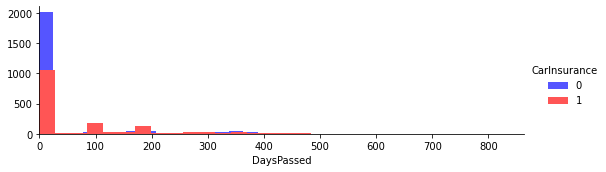

In [25]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'DaysPassed',bins=30)
facet.set(xlim=(0,Insurance_data.DaysPassed.max()+10))
facet.add_legend()

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


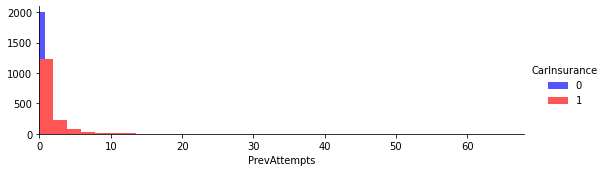

In [26]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'PrevAttempts',bins=30)
facet.set(xlim=(0,Insurance_data.PrevAttempts.max()+10))
facet.add_legend()

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


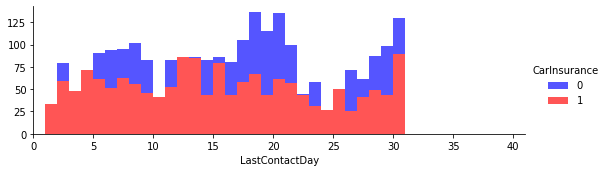

In [27]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'LastContactDay',bins=30)
facet.set(xlim=(0,Insurance_data.LastContactDay.max()+10))
facet.add_legend()

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


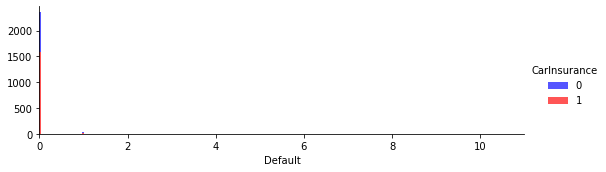

In [28]:
facet=sns.FacetGrid(Insurance_data,hue='CarInsurance',size=2.5,aspect=3,palette='seismic')
facet.map(plt.hist,'Default',bins=30)
facet.set(xlim=(0,Insurance_data.Default.max()+10))
facet.add_legend()

In [29]:
#get categorical variables
categorical_cols=Insurance_data.select_dtypes(include=['object']).columns

In [30]:
categorical_cols

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [31]:
#removing call start and call end variables
categorical_col_plot=categorical_cols[(categorical_cols!='CallStart')&(categorical_cols!='CallEnd')]

In [32]:
categorical_col_plot

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anacond

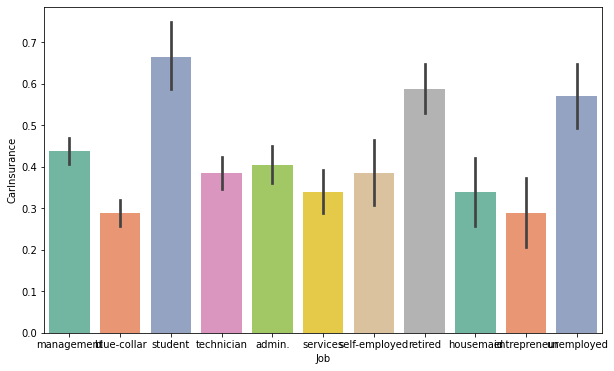

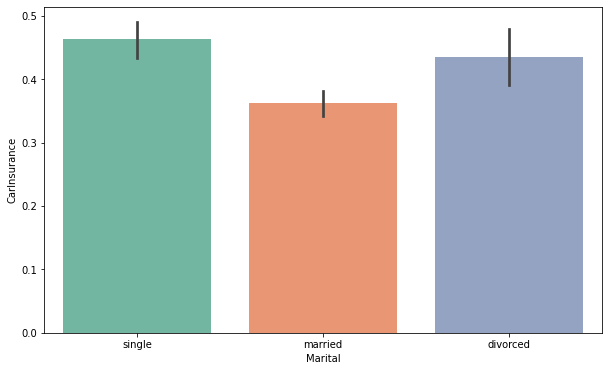

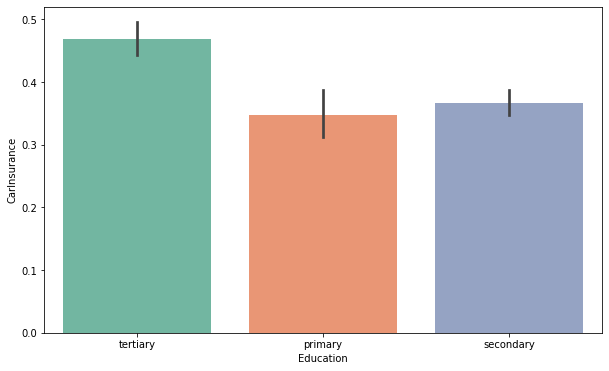

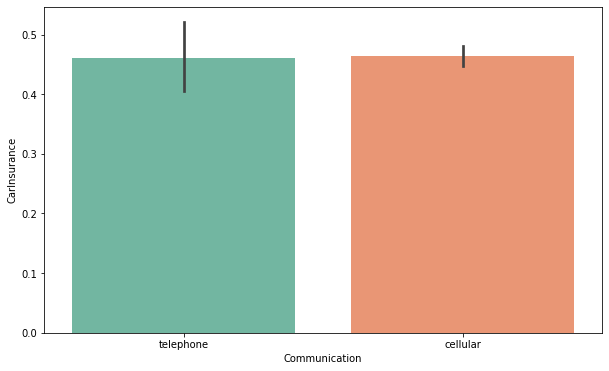

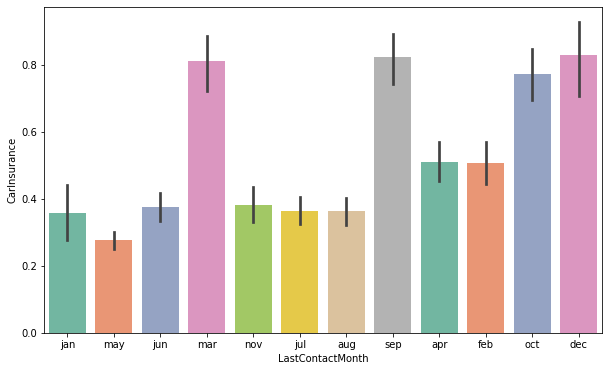

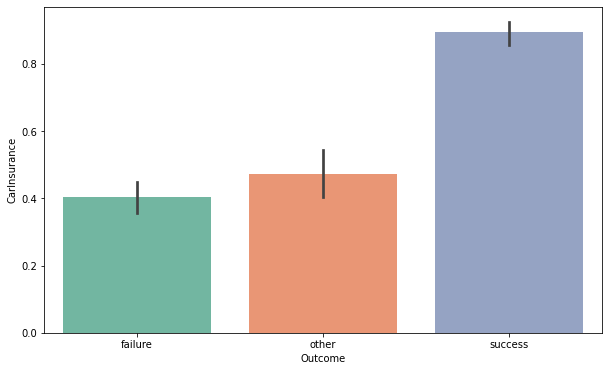

In [33]:
#run a for loop to build plot for all categorical variables
for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance',data=Insurance_data,palette='Set2')

In [34]:
Insurance_data[Insurance_data.Balance>80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [35]:
Insurance_data=Insurance_data.drop(Insurance_data[Insurance_data.index==1742].index)

In [36]:
Insurance_data[Insurance_data.Balance>80000] #Outlier removed since no value being printed

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


### Handling Missing data

In [37]:
Insurance_data.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [38]:
merge_data=pd.concat([Insurance_data,Insurance_test],keys=('train','test'))

In [39]:
merge_data

Id  Age          Job  Marital  Education  Default  Balance  \
train 0       1   32   management   single   tertiary        0     1218   
      1       2   32  blue-collar  married    primary        0     1156   
      2       3   29   management   single   tertiary        0      637   
      3       4   25      student   single    primary        0      373   
      4       5   30   management  married   tertiary        0     2694   
...         ...  ...          ...      ...        ...      ...      ...   
test  995  4996   31       admin.   single  secondary        0      131   
      996  4997   52   management  married   tertiary        0     2635   
      997  4998   46   technician  married   tertiary        0     3009   
      998  4999   60      retired  married  secondary        0     7038   
      999  5000   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                jan             2          -1             0      NaN   
      1                may             5          -1             0      NaN   
      2                jun             1         119             1  failure   
      3                may             2          -1             0      NaN   
      4                jun             1          -1             0      NaN   
...                    ...           ...         ...           ...      ...   
test  995              jun             1          -1             0      NaN   
      996              sep             1         108             8  success   
      997              aug             2          -1             0      NaN   
      998              oct             4          -1             0      NaN   
      999              may             2          -1             0      NaN   

          CallStart   CallEnd  CarInsurance  
train 0    13:45:20  13:46:30           0.0  
      1    14:49:03  14:52:08           0.0  
      2    16:30:24  16:36:04           1.0  
      3    12:06:43  12:20:22           1.0  
      4    14:35:44  14:38:56           0.0  
...             ...       ...           ...  
test  995  13:54:24  13:56:55           NaN  
      996  13:13:38  13:18:51           NaN  
      997  10:23:35  10:24:33           NaN  
      998  17:01:49  17:04:07           NaN  
      999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [40]:
#remove id and CarInsurance variable
merge_data.drop(['CarInsurance','Id'],axis=1,inplace=True)

In [41]:
merge_data.shape

(4999, 17)

In [42]:
#total missing values in data
total_missing=merge_data.isnull().sum()

In [43]:
total_missing

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
dtype: int64

In [44]:
merge_data.isnull().count()

Age                 4999
Job                 4999
Marital             4999
Education           4999
Default             4999
Balance             4999
HHInsurance         4999
CarLoan             4999
Communication       4999
LastContactDay      4999
LastContactMonth    4999
NoOfContacts        4999
DaysPassed          4999
PrevAttempts        4999
Outcome             4999
CallStart           4999
CallEnd             4999
dtype: int64

In [45]:
#calculate percentage
percentage=total_missing/merge_data.isnull().count()

In [46]:
percentage

Age                 0.000000
Job                 0.004801
Marital             0.000000
Education           0.043209
Default             0.000000
Balance             0.000000
HHInsurance         0.000000
CarLoan             0.000000
Communication       0.224645
LastContactDay      0.000000
LastContactMonth    0.000000
NoOfContacts        0.000000
DaysPassed          0.000000
PrevAttempts        0.000000
Outcome             0.759752
CallStart           0.000000
CallEnd             0.000000
dtype: float64

In [47]:
#combine total_missing and percentage
NAs=pd.concat([total_missing,percentage],axis=1,keys=('Total','Percentage'))

In [48]:
NAs

,Total,Percentage
Age,0,0.000000
Job,24,0.004801
Marital,0,0.000000
Education,216,0.043209
Default,0,0.000000
Balance,0,0.000000
HHInsurance,0,0.000000
CarLoan,0,0.000000
Communication,1123,0.224645
LastContactDay,0,0.000000


In [49]:
#getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentage
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [50]:
#Replacing missing values
merge_data_df=merge_data.copy() #creating copy of the dataset

In [51]:
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

<h3>nunique()</h3> 

This function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index. By default the NaN values are not included in the count.

In [52]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [53]:
merge_data_df[merge_data_df.DaysPassed==-1]

Age          Job  Marital  Education  Default  Balance  \
train 0     32   management   single   tertiary        0     1218   
      1     32  blue-collar  married    primary        0     1156   
      3     25      student   single    primary        0      373   
      4     30   management  married   tertiary        0     2694   
      6     37       admin.   single   tertiary        0     1000   
...        ...          ...      ...        ...      ...      ...   
test  993   41     services  married  secondary        0      138   
      995   31       admin.   single  secondary        0      131   
      997   46   technician  married   tertiary        0     3009   
      998   60      retired  married  secondary        0     7038   
      999   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
      6              1        0      cellular              17   
...                ...      ...           ...             ...   
test  993            1        0           NaN               1   
      995            1        0      cellular              15   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts Outcome  \
train 0                jan             2          -1             0     NaN   
      1                may             5          -1             0     NaN   
      3                may             2          -1             0     NaN   
      4                jun             1          -1             0     NaN   
      6                mar             1          -1             0     NaN   
...                    ...           ...         ...           ...     ...   
test  993              jul             3          -1             0     NaN   
      995              jun             1          -1             0     NaN   
      997              aug             2          -1             0     NaN   
      998              oct             4          -1             0     NaN   
      999              may             2          -1             0     NaN   

          CallStart   CallEnd  
train 0    13:45:20  13:46:30  
      1    14:49:03  14:52:08  
      3    12:06:43  12:20:22  
      4    14:35:44  14:38:56  
      6    13:00:02  13:03:17  
...             ...       ...  
test  993  14:33:09  14:35:25  
      995  13:54:24  13:56:55  
      997  10:23:35  10:24:33  
      998  17:01:49  17:04:07  
      999  12:15:19  12:30:34  

[3798 rows x 17 columns]

In [54]:
merge_data_df.loc[merge_data_df['DaysPassed']==-1,'Outcome']='NoPrev' 
#loc used to check given condition by each index.

In [55]:
merge_data_df.Outcome.value_counts(1)

NoPrev     0.759752
failure    0.109622
success    0.081016
other      0.049610
Name: Outcome, dtype: float64

In [56]:
merge_data_df.Outcome.isnull().sum()

0

In [57]:
merge_data_df.Communication.value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [58]:
merge_data_df.Communication.fillna('None',inplace=True)

In [59]:
merge_data_df.Communication.value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

In [60]:
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [127]:
#create job-education level mapping list
edu_mode=[]

In [62]:
#what are different job types
job_types=merge_data_df.Job.value_counts().index

In [63]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [64]:
#Checking which job is most common
merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [65]:
for job in job_types:
    mode=merge_data_df[merge_data_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode=np.append(edu_mode,mode)

In [66]:
edu_mode

array(['tertiary', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'tertiary', 'secondary', 'secondary', 'tertiary',
       'primary'], dtype=object)

In [134]:
merge_data_df.Job.value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid', 'None'],
      dtype='object')

In [132]:
merge_data_df.Job.value_counts().nlargest().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services'], dtype='object')

In [67]:
edu_map=pd.Series(edu_mode,index=merge_data_df.Job.value_counts().index)

In [68]:
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [69]:
#apply the mapping to missing education variable
for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull())&
                     (merge_data_df['Job']==j),'Education']=edu_map.loc[edu_map.index==j][0]

In [70]:
merge_data_df['Education'].fillna('None',inplace=True)

In [71]:
merge_data_df.Education.value_counts()

secondary    2639
tertiary     1649
primary       700
None           11
Name: Education, dtype: int64

In [72]:
#How Many missing values in job
merge_data_df.Job.isnull().sum()

24

In [73]:
#filling missing Values in Job with None
merge_data_df.Job.fillna('None',inplace=True)

In [74]:
merge_data_df.Job.isnull().sum()

0

In [75]:
merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
None               24
Name: Job, dtype: int64

In [76]:
merge_data_df.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [77]:
import sys

In [78]:
sys.version

'3.8.11 (default, Aug  6 2021, 09:58:08) [MSC v.1916 32 bit (Intel)]'

In [79]:
# lets seperate numeric and categorical data
numeric_dtypes=merge_data_df.select_dtypes(include=[np.number]).columns
categorical_dtypes=merge_data_df.select_dtypes(include=['object']).columns

In [80]:
numeric_dtypes

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts'],
      dtype='object')

In [81]:
merge_data_df_num=merge_data_df[numeric_dtypes] # Seperating numeric data
merge_data_df_cat=merge_data_df[categorical_dtypes] #seperating categorical data

In [82]:
merge_data_df_num.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts'],
      dtype='object')

In [83]:
merge_data_df_cat.columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [84]:
# we will remove  call start and call end from our variables
merge_data_df_cat=merge_data_df_cat[['Job','Marital','Education','Communication','LastContactMonth','Outcome']]

In [85]:
merge_data_df_cat.columns

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

In [139]:
# Create dummy Variable
merge_data_df_cat_dummies=pd.get_dummies(merge_data_df_cat)
Insurance_data_dummy=pd.concat([merge_data_df_num,merge_data_df_cat_dummies],axis=1)

In [87]:
#Insurance_Data_dummy.head()

In [141]:
Insurance_data_dummy.isna().sum() # Checking if we have missing values before training model

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_None             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMon

In [89]:
# split Train test using index we created
idx=pd.IndexSlice
train_df=Insurance_data_dummy.loc[idx[['train',],:]]
test_df=Insurance_data_dummy.loc[idx[['test'],:]]

In [90]:
idx

In [91]:
#Creating Label
train_label=Insurance_data['CarInsurance']
print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


### Splitting the data(train_df)into train test split


In [92]:
x_train,x_test,y_train,y_test=train_test_split(train_df,train_label,train_size=0.7,random_state=100)

### Building Logistic Regression Model

In [93]:
lr=LogisticRegression()

In [94]:
lr2=LogisticRegression(max_iter=1000)

In [95]:
x_train

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 2472   40        0       -9            1        0              15   
      2191   27        0      311            0        0               2   
      1146   38        0       19            1        0              30   
      3355   40        0       35            0        0               3   
      3926   46        0       57            0        0              28   
...         ...      ...      ...          ...      ...             ...   
      3928   69        0      482            0        0               2   
      3944   45        0     3133            1        1              10   
      1860   69        0     1080            0        0              18   
      2841   46        0        4            0        0               8   
      1544   40        0       27            0        0              20   

            NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 2472             2          -1             0         0  ...   
      2191             3         322             1         0  ...   
      1146             2          -1             0         0  ...   
      3355             4         317             3         0  ...   
      3926             1          -1             0         0  ...   
...                  ...         ...           ...       ...  ...   
      3928             2          -1             0         0  ...   
      3944             1          -1             0         0  ...   
      1860             2         118             2         0  ...   
      2841             4          -1             0         0  ...   
      1544             2          -1             0         0  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 2472                     0                     0                     1   
      2191                     0                     1                     0   
      1146                     0                     0                     1   
      3355                     0                     0                     0   
      3926                     0                     0                     1   
...                          ...                   ...                   ...   
      3928                     0                     0                     0   
      3944                     0                     0                     0   
      1860                     0                     0                     0   
      2841                     0                     0                     0   
      1544                     0                     0                     0   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 2472                     0                     0                     0   
      2191                     0                     0                     0   
      1146                     0                     0                     0   
      3355                     0                     0                     0   
      3926                     0                     0                     0   
...                          ...                   ...                   ...   
      3928                     0                     0                     0   
      3944                     0                     0                     0   
      1860                     0                     0                     0   
      2841                     0                     0                     0   
      1544                     0                     0                     0   

            Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 2472               1                0              0                0  
      2191               0                0              1                0  
      1146               1                0              0                0  
      3355               0                1     

In [96]:
y_train

2472    1
2191    1
1146    1
3355    0
3926    1
       ..
3928    1
3944    1
1860    0
2841    1
1544    1
Name: CarInsurance, Length: 2799, dtype: int64

In [97]:
# fit the model
lr.fit(x_train,y_train)

C:\Users\sasai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
# fit the model
lr2.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [99]:
#making predictions using data
y_pred = lr.predict(x_test)

In [100]:
y_pred2=lr2.predict(x_test)

In [101]:
y_pred # prediction for test data

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [102]:
#getting model performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [103]:
confusion_matrix(y_test,y_pred)

array([[612, 115],
       [274, 199]], dtype=int64)

In [104]:
confusion_matrix(y_test,y_pred2)

array([[626, 101],
       [238, 235]], dtype=int64)

In [105]:
from sklearn.metrics import f1_score

In [106]:
f1_score(y_test,y_pred)

0.50571791613723

In [107]:
f1_score(y_test,y_pred2)

0.5809641532756489

In [108]:
accuracy_score(y_test,y_pred)

0.6758333333333333

In [109]:
accuracy_score(y_test,y_pred2)

0.7175

In [110]:
precision_score(y_test,y_pred)

0.6337579617834395

In [111]:
precision_score(y_test,y_pred2)

0.6994047619047619

In [112]:
recall_score(y_test,y_pred)

0.42071881606765327

In [1]:
recall_score(y_test,y_pred2)

NameError: name 'recall_score' is not defined

In [113]:
roc_auc_score(y_test,y_pred)

0.6312672484739917

In [114]:
roc_auc_score(y_test,y_pred2)

0.6789508274905415

### standardize and scale continuous variables
### apply polynomial transformation
### perform ridge regression

In [115]:
x_train.shape

(2799, 47)

In [116]:
y_train.shape

(2799,)

In [117]:
type(y_train)

pandas.core.series.Series

In [118]:
type(x_train)

pandas.core.frame.DataFrame

In [119]:
y_arr = np.asarray(y_train)

In [120]:
x_arr = np.asarray(x_train)

In [121]:
logit_mod2 = sm.Logit(y_arr,x_arr)

In [122]:
result2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.562245
         Iterations 8


In [123]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.167      
Dependent Variable:  y                 AIC:               3231.4469  
Date:                2021-09-06 20:10  BIC:               3480.8017  
No. Observations:    2799              Log-Likelihood:    -1573.7    
Df Model:            41                LL-Null:           -1888.3    
Df Residuals:        2757              LLR p-value:       2.4411e-106
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      8.0000                                          
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0046        0.0052  0.8935 0.3716        -0.0055        0.0147
x2  -0.2270        0.3855 -0.5888 0.5560        -0.9826        0.5286
x3   0.0000        0.0000  0.2359 0.8135        -0.0000        0.0000
x4  -0.5830        0.1016 -5.7409 0.0000        -0.7820       -0.3840
x5  -0.2016        0.1383 -1.4574 0.1450        -0.4727        0.0695
x6  -0.0015        0.0060 -0.2431 0.8080        -0.0132        0.0103
x7  -0.0631        0.0187 -3.3777 0.0007        -0.0997       -0.0265
x8   0.0006        0.0008  0.8102 0.4178        -0.0009        0.0022
x9   0.0698        0.0327  2.1350 0.0328         0.0057        0.1339
x10  0.2118  8175638.3640  0.0000 1.0000 -16023956.5323 16023956.9558
x11  0.1280  9995377.0182  0.0000 1.0000 -19590578.8396 19590579.0956
x12  0.0823 11555110.1947  0.0000 1.0000 -22647599.7367 22647599.9013
x13 -0.3292  9895348.1673 -0.0000 1.0000 -19394526.3516 19394525.6932
x14 -0.2540  7939369.6610 -0.0000 1.0000 -15560878.8495 15560878.3416
x15 -0.0559  9532946.6442 -0.0000 1.0000 -18684232.1451 18684232.0333
x16  0.3140 11154683.7581  0.0000 1.0000 -21862778.1108 21862778.7387
x17 -0.3531  9877278.7123 -0.0000 1.0000 -19359110.8945 19359110.1883
x18  0.0496  9793459.5767  0.0000 1.0000 -19194828.0048 19194828.1041
x19  0.5631  9523379.3029  0.0000 1.0000 -18665479.8817 18665481.0080
x20  0.0243  8662709.2359  0.0000 1.0000 -16978598.0867 16978598.1352
x21  0.4641 10456507.0544  0.0000 1.0000 -20494376.7665 20494377.6947
x22  0.2802           nan     nan    nan            nan           nan
x23 -0.1812           nan     nan    nan            nan           nan
x24  0.1598  1959469.6797  0.0000 1.0000  -3840489.8413  3840490.1609
x25 -0.0209  2147033.7207 -0.0000 1.0000  -4208108.7871  4208108.7452
x26 -0.1144  2570028.5485 -0.0000 1.0000  -5037163.5088  5037163.2800
x27 -0.2137  2783349.3916 -0.0000 1.0000  -5455264.7777  5455264.3503
x28  0.1861  2580299.1665  0.0000 1.0000  -5057293.2497  5057293.6218
x29 -0.6975           nan     nan    nan            nan           nan
x30  0.4817           nan     nan    nan            nan           nan
x31  0.3897           nan     nan    nan            nan           nan
x32 -0.0031  3999581.3756 -0.0000 1.0000  -7839035.4524  7839035.4463
x33 -0.7322  3998683.2996 -0.0000 1.0000  -7837275.9849  7837274.5206
x34  0.7718  4000479.2500  0.0000 1.0000  -7840794.4790  7840796.0226
x35 -0.3070  3998683.2996 -0.0000 1.0000  -7837275.5597  7837274.9458
x36 -1.0749  3997785.0218 -0.0000 1.0000  -7835515.7357  7835513.5858
x37 -0.4410  3999581.3756 -0.0000 1.0000  -7839035.8903  7839035.0084
x38  0.1597  3998683.2996  0.0000 1.0000  -7837275.0931  7837275.4124
x39  1.1095  3999581.3756  0.0000 1.0000  -7839034.3399  7839036.5588
x40 -0.2897  3998683.2996 -0.0000 1.0000  -7837275.5424  7837274.9631
x41 -0.6775  4000479.2500 -0.0000 1.0000  -7840795.9283  7840794.5733
x42  0.9774  3999581.3756  0.0000 1.0000  -7839034.4719  7839036.4268
x43  0.6809  3999581.3756  0.0000 1.0000  -7839034.7685  7839036.1302
x44 -0.1578           nan     nan    nan            nan    

In [124]:
logit_mod3 = sm.Logit(y_train.values.tolist(),x_train.values.tolist())

In [125]:
result3 = logit_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.562245
         Iterations 8


In [126]:
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.167      
Dependent Variable:  y                 AIC:               3231.4469  
Date:                2021-09-06 20:10  BIC:               3480.8017  
No. Observations:    2799              Log-Likelihood:    -1573.7    
Df Model:            41                LL-Null:           -1888.3    
Df Residuals:        2757              LLR p-value:       2.4411e-106
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      8.0000                                          
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0046        0.0052  0.8935 0.3716        -0.0055        0.0147
x2  -0.2270        0.3855 -0.5888 0.5560        -0.9826        0.5286
x3   0.0000        0.0000  0.2359 0.8135        -0.0000        0.0000
x4  -0.5830        0.1016 -5.7409 0.0000        -0.7820       -0.3840
x5  -0.2016        0.1383 -1.4574 0.1450        -0.4727        0.0695
x6  -0.0015        0.0060 -0.2431 0.8080        -0.0132        0.0103
x7  -0.0631        0.0187 -3.3777 0.0007        -0.0997       -0.0265
x8   0.0006        0.0008  0.8102 0.4178        -0.0009        0.0022
x9   0.0698        0.0327  2.1350 0.0328         0.0057        0.1339
x10  0.2118  8175638.3640  0.0000 1.0000 -16023956.5323 16023956.9558
x11  0.1280  9995377.0182  0.0000 1.0000 -19590578.8396 19590579.0956
x12  0.0823 11555110.1947  0.0000 1.0000 -22647599.7367 22647599.9013
x13 -0.3292  9895348.1673 -0.0000 1.0000 -19394526.3516 19394525.6932
x14 -0.2540  7939369.6610 -0.0000 1.0000 -15560878.8495 15560878.3416
x15 -0.0559  9532946.6442 -0.0000 1.0000 -18684232.1451 18684232.0333
x16  0.3140 11154683.7581  0.0000 1.0000 -21862778.1108 21862778.7387
x17 -0.3531  9877278.7123 -0.0000 1.0000 -19359110.8945 19359110.1883
x18  0.0496  9793459.5767  0.0000 1.0000 -19194828.0048 19194828.1041
x19  0.5631  9523379.3029  0.0000 1.0000 -18665479.8817 18665481.0080
x20  0.0243  8662709.2359  0.0000 1.0000 -16978598.0867 16978598.1352
x21  0.4641 10456507.0544  0.0000 1.0000 -20494376.7665 20494377.6947
x22  0.2802           nan     nan    nan            nan           nan
x23 -0.1812           nan     nan    nan            nan           nan
x24  0.1598  1959469.6797  0.0000 1.0000  -3840489.8413  3840490.1609
x25 -0.0209  2147033.7207 -0.0000 1.0000  -4208108.7871  4208108.7452
x26 -0.1144  2570028.5485 -0.0000 1.0000  -5037163.5088  5037163.2800
x27 -0.2137  2783349.3916 -0.0000 1.0000  -5455264.7777  5455264.3503
x28  0.1861  2580299.1665  0.0000 1.0000  -5057293.2497  5057293.6218
x29 -0.6975           nan     nan    nan            nan           nan
x30  0.4817           nan     nan    nan            nan           nan
x31  0.3897           nan     nan    nan            nan           nan
x32 -0.0031  3999581.3756 -0.0000 1.0000  -7839035.4524  7839035.4463
x33 -0.7322  3998683.2996 -0.0000 1.0000  -7837275.9849  7837274.5206
x34  0.7718  4000479.2500  0.0000 1.0000  -7840794.4790  7840796.0226
x35 -0.3070  3998683.2996 -0.0000 1.0000  -7837275.5597  7837274.9458
x36 -1.0749  3997785.0218 -0.0000 1.0000  -7835515.7357  7835513.5858
x37 -0.4410  3999581.3756 -0.0000 1.0000  -7839035.8903  7839035.0084
x38  0.1597  3998683.2996  0.0000 1.0000  -7837275.0931  7837275.4124
x39  1.1095  3999581.3756  0.0000 1.0000  -7839034.3399  7839036.5588
x40 -0.2897  3998683.2996 -0.0000 1.0000  -7837275.5424  7837274.9631
x41 -0.6775  4000479.2500 -0.0000 1.0000  -7840795.9283  7840794.5733
x42  0.9774  3999581.3756  0.0000 1.0000  -7839034.4719  7839036.4268
x43  0.6809  3999581.3756  0.0000 1.0000  -7839034.7685  7839036.1302
x44 -0.1578           nan     nan    nan            nan    